<a href="https://colab.research.google.com/github/ayan524-ai/change-detection-using-remotely-sensed-images/blob/main/Pixel%20wise%20difference%20along%20with%20change%20mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving change.png to change.png
Saving img1.png to img1.png
Files uploaded: ['.config', 'img1.png', 'change.png', 'sample_data']


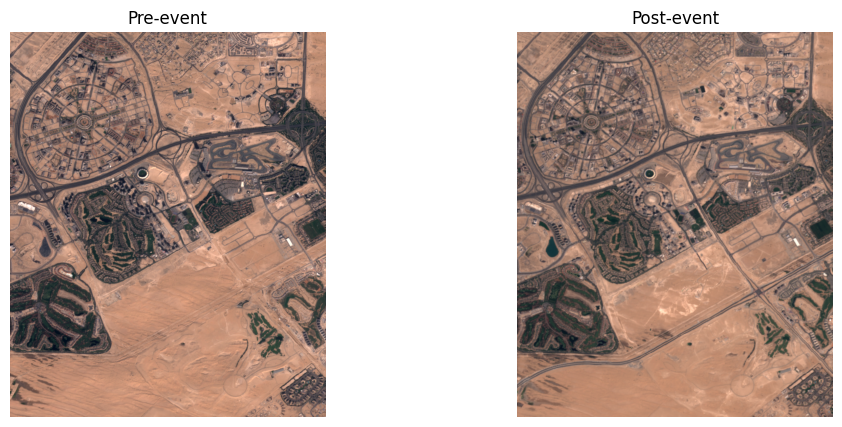

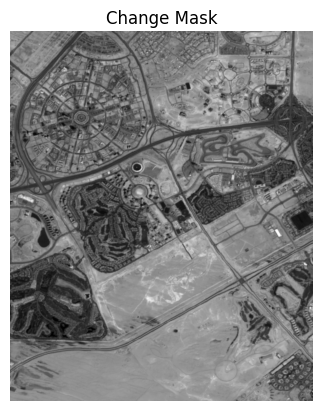

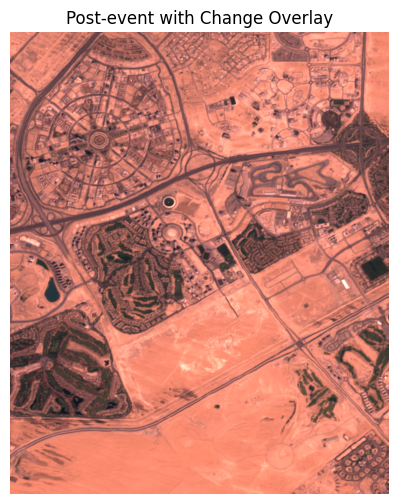

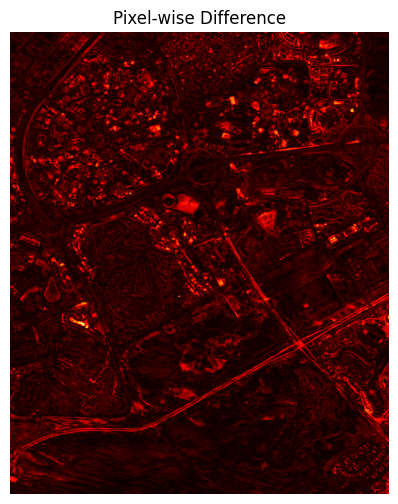

In [ ]:
from google.colab import files
uploaded = files.upload()

import os
print("Files uploaded:", os.listdir())

import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread("img1.png") # replace if filename differs
img2 = cv2.imread("change.png")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1); plt.imshow(img1); plt.title("Pre-event"); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(img2); plt.title("Post-event"); plt.axis("off")
plt.show()

mask = cv2.imread("change.png", cv2.IMREAD_GRAYSCALE) # change filename if needed

if mask is not None:
    plt.imshow(mask, cmap='gray'); plt.title("Change Mask"); plt.axis("off"); plt.show()
else:
    print("Error loading mask image. Please check the filename and ensure it's uploaded.")


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ensure img2 and mask are loaded
overlay = img2.copy()

# Convert post-event image to BGR for blending
overlay = cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR)

# Create a red color mask using the change mask
color_mask = np.zeros_like(overlay)
color_mask[:, :, 2] = mask  # Red channel

# Blend mask with the original image
alpha = 0.4  # Transparency level
blended = cv2.addWeighted(overlay, 1, color_mask, alpha, 0)

# Convert back to RGB for display
blended_rgb = cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)

# Display result
plt.figure(figsize=(6, 6))
plt.imshow(blended_rgb)
plt.title("Post-event with Change Overlay")
plt.axis("off")
plt.show()
# Convert both images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

# Calculate absolute difference
diff = cv2.absdiff(gray1, gray2)

# Normalize for better visualization
diff_normalized = cv2.normalize(diff, None, 0, 255, cv2.NORM_MINMAX)

# Display difference map
plt.figure(figsize=(6, 6))
plt.imshow(diff_normalized, cmap='hot')
plt.title("Pixel-wise Difference")
plt.axis("off")
plt.show()

